In [4]:
#from __future__ import division

#import datetime
import itertools
import json
import requests
# from requests_html import HTMLSession
#import operator


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
#import scipy.stats
#import statsmodels.api as sm

%matplotlib inline


In [5]:
url_6 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=1948cf36-2df1-4e98-95d7-152d30193d3c'
data_6 = pd.read_csv(url_6, encoding='big5')

url_5 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=91fbb8c2-4316-44ac-a101-e7b7ff3ba450'
data_5 = pd.read_csv(url_5, encoding='big5')

url_4 = 'C:/Users/user/Downloads/104a1a2.csv'
data_4 = pd.read_csv(url_4, encoding='utf-8')

url_3 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=5b31590b-1af7-4fed-ac25-6190178acfb5'
data_3 = pd.read_csv(url_3, encoding='big5')

url_2 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=c7fc1411-a8f0-4258-9f66-e16e58dd2cdd'
data_2 = pd.read_csv(url_2, encoding='big5')

url_1 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=dbc05cbf-cced-4793-84e8-fda5f67200da'
data_1 = pd.read_csv(url_1, encoding='big5')


In [45]:
#自行車車禍數量
bike_6 = data_6["車種"] == "F01"
bike_5 = data_5["車種"] == "F01"
bike_4 = data_4["車種"] == "F01"
bike_3 = data_3["車種"] == "F01"
bike_2 = data_2["車種"] == "F01"
bike_1 = data_1["車種"] == "F01"
# print(data_6.loc[bike_6])
# print

list_a = [len(data_1[bike_1]),len(data_2[bike_2]),len(data_3[bike_3]),len(data_4[bike_4]),len(data_5[bike_5]),len(data_6[bike_6])]
list_t = [len(data_1),len(data_2),len(data_3),len(data_4),len(data_5),len(data_6)]
data = ['101','102','103','104','105','106']
dict_t = {"年份":data,'車禍數量':list_t}
dict_a = {"年份":data,"自行車車禍案件":list_a}

df_t = pd.DataFrame(dict_t)
df_a = pd.DataFrame(dict_a)
result = df_t.merge(df_a)

print(result)

    年份   車禍數量  自行車車禍案件
0  101  45950     1073
1  102  47705     1196
2  103  49135     1283
3  104  49519     1217
4  105  51692     1277
5  106  50951     1189


In [50]:
print(data_6.loc[bike_6])

       發生年  發生月  發生日  發生時  發生分  處理別     區序                          肇事地點  \
0      106    1    3    8   58    2  01大同區                     大同區大龍街85巷   
12     106    1   13    9   20    2  01大同區                  大同區長安西路與塔城街口   
62     106    2   16   19   20    2  01大同區           大同區通河西街1段明倫高中後方堤外便道   
87     106    9   11    9   48    2  01大同區                大同區延平北路2段與保安街口   
93     106    4   12    8   50    2  01大同區                   大同區南京西路310號   
122    106    2    2   22   54    2  01大同區         南京西路與塔城街口(南京西路259號附近)   
150    106    1   22   10   30    2  01大同區                大同區民族西路與承德路3段口   
203    106    3   14   19   15    2  01大同區                   大同區民生西路292號   
447    106    8    2   17    8    2  01大同區                    大同區歸綏街237號   
513    106   10   14   23   25    2  01大同區                 大同區承德路2段與錦西街口   
536    106    7   25    0   25    2  01大同區                大同區忠孝西路2段與塔城街口   
540    106    8    7    7   28    2  01大同區             大同區民權西路與民權西路133巷口   
614    106  

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


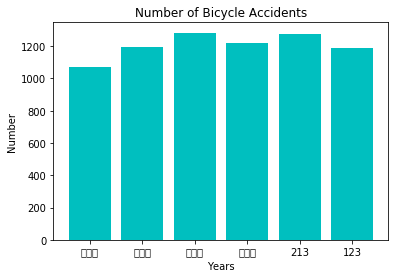

In [30]:
#自行車車禍數量

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y1 = list_a
x1 = ['101年','102年','103年','104年','105年','106年']
plt.xlabel("Years")
plt.ylabel("Number")
plt.title('Number of Bicycle Accidents')

plt.bar(x1,y1,color = "c")
plt.show()

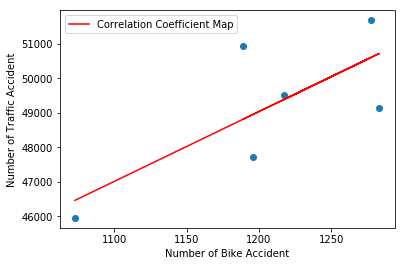

In [16]:
xs = list_a
ys = list_t
# np.corrcoef(list_a,list_t)
plt.scatter(list_a,list_t)

def slope(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m = round(m,2)
    b = (np.mean(y)-np.mean(x)*m)
    b = round(b,2)
    return m,b
m,b = slope(xs,ys)

reg_line = [(m*x)+b for x in xs]
plt.xlabel('Number of Bike Accident')
plt.ylabel('Number of Traffic Accident')

plt.plot(xs,reg_line,color = "r",label='Correlation Coefficient Map')
plt.legend(loc='best')
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


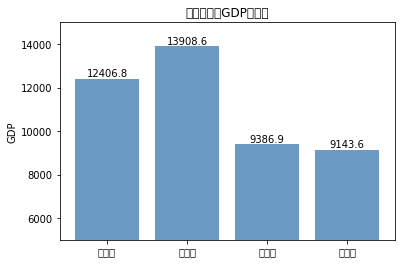

In [35]:
# 导入绘图模块
import matplotlib.pyplot as plt
# 构建数据
GDP = [12406.8,13908.57,9386.87,9143.64]

# 中文乱码的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘图
plt.bar(range(4), GDP, align = 'center',color='steelblue', alpha = 0.8)
# 添加轴标签
plt.ylabel('GDP')
# 添加标题
plt.title('四个直辖市GDP大比拼')
# 添加刻度标签
plt.xticks(range(4),['北京市','上海市','天津市','重庆市'])
# 设置Y轴的刻度范围
plt.ylim([5000,15000])

# 为每个条形图添加数值标签
for x,y in enumerate(GDP):
    plt.text(x,y+100,'%s' %round(y,1),ha='center')
    
# 显示图形
plt.show()

In [17]:
url = 'C:/Users/user/Desktop/ubike_num.csv'
num = pd.read_csv(url, encoding = 'big5')
# location = num.groupby('租借次數(車次)').size()
num.dropna()
# a = num.get("租借次數(車次)")
# print(a)
# print(num)
n = num.iloc[0:9,1]
m = num.iloc[0:9,0]
total = num.iloc[:]

series_n =  pd.Series(n)
series_m = pd.Series(m)

print(total)


        月份    租借次數(車次)
0   103年3月     1767106
1   103年4月     1938518
2   104年3月     2065266
3   104年4月     1662426
4   105年3月     1242340
5   105年4月     1582565
6   106年3月     1719024
7   106年4月     1900724
8   107年3月     2191938
9   107年4月     2221447


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


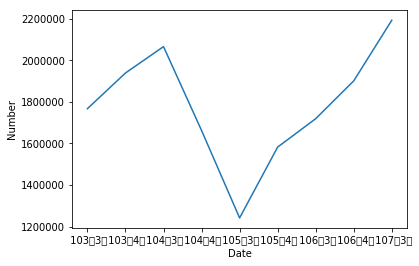

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y1 = series_n
x1 = series_m
plt.xlabel("Date")
plt.ylabel("Number")
# plt.rcParams['font.sans-serif']=['SimHei']



plt.plot(x1,y1)
plt.show()


In [1]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [32]:
ped_6 = data_6["車種"] == "H01"
ped_5 = data_5["車種"] == "H01"
ped_4 = data_4["車種"] == "H01"
ped_3 = data_3["車種"] == "H01"
ped_2 = data_2["車種"] == "H01"
ped_1 = data_1["車種"] == "H01"

b6 = len(data_6[ped_6])
b5 = len(data_5[ped_5])
b4 = len(data_4[ped_4])
b3 = len(data_3[ped_3])
b2 = len(data_2[ped_2])
b1 = len(data_1[ped_1])

list_b = [b1,b2,b3,b4,b5,b6]

print(list_b)

[2485, 2400, 2238, 2152, 2362, 2253]


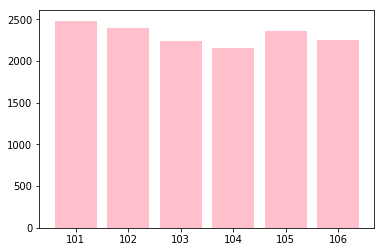

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y1 = list_b
x1 = ['101','102','103','104','105','106']
plt.bar(x1,y1,color = "pink")
plt.show()

In [41]:
#事故位置
location_6 = data_6.groupby("9事故位置" and "車種").size()
location_5 = data_5.groupby("9事故位置" and "車種").size()
location_3 = data_3.groupby("9事故位置" and "車種").size()
location_2 = data_2.groupby("9事故位置" and "車種").size()
location_1 = data_1.groupby("9事故位置" and "車種").size()

list_c = [location_6,location_5,location_3,location_2,location_1]
df_location = pd.DataFrame(list_c)
# print(df_location)

df_location[['F01',"H01"]]

,F01,H01
0,1189.0,2253.0
1,1277.0,2362.0
2,1283.0,2238.0
3,1196.0,2400.0
4,1073.0,2485.0


In [5]:
#速限
limit_6 = data_6.groupby("7速限").size()
limit_5 = data_5.groupby("7速限").size()
limit_3 = data_3.groupby("7速限").size()
limit_2 = data_2.groupby("7速限").size()
limit_1 = data_1.groupby("7速限").size()

# limit_6.get("50")

list_limit = [limit_6,limit_5,limit_3,limit_2,limit_1]
df_limit = pd.DataFrame(list_limit)
# print(df_limit)
df_limit['50']


KeyError: '50'